In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import scipy.io as sci
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.applications.resnet50 import ResNet50
import joblib

In [ ]:
from os import listdir as ls
ls("/home/DAVIDSON/brwiedenbeck/public")

['kmnist', 'NLP', 'chest_xrays', 'brain_scans', 'birds', 'emnist']

In [ ]:
trainGen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=[0.1, 10.0],
    shear_range=0.0,
    zoom_range=[0,50],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=True,
    preprocessing_function=None
)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        directory = 'birds/train',
        color_mode = 'grayscale',
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
        directory = 'birds/valid',
        color_mode = 'grayscale',
        target_size=(180, 180),
        batch_size=32,
        class_mode='categorical')

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [103]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3),strides = 1, activation='relu', input_shape=(180, 180, 1)))
model1.add(BatchNormalization())
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(Dropout(0.5))

model1.add(layers.Conv2D(64, (3, 3),strides = 1, activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(Dropout(0.5))

model1.add(layers.Conv2D(100, (3, 3),strides = 1, activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(Dropout(0.5))

model1.add(layers.Flatten())
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model1.add(layers.Dense(units=32, activation='relu'))

model1.add(layers.Dense(units=450, activation='softmax'))

In [104]:
model1.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 178, 178, 32)      320       
_________________________________________________________________
module_wrapper_39 (ModuleWra (None, 178, 178, 32)      128       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 44, 44, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 42, 42, 64)        18496     
_________________________________________________________________
module_wrapper_40 (ModuleWra (None, 42, 42, 64)        256       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 10, 10, 64)      

In [ ]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
             loss=keras.losses.categorical_crossentropy,
             metrics=['acc'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

history = model1.fit(train_generator, epochs=10, batch_size = 10, validation_data = validation_generator,callbacks=[reduce_lr])                             

Epoch 1/10
2208/2208 [==============================] - 258s 117ms/step - loss: 6.0722 - acc: 0.0036 - val_loss: 6.3266 - val_acc: 0.0049
Epoch 2/10
2208/2208 [==============================] - 261s 118ms/step - loss: 5.8261 - acc: 0.0121 - val_loss: 5.7947 - val_acc: 0.0151
Epoch 3/10
2208/2208 [==============================] - 256s 116ms/step - loss: 5.4758 - acc: 0.0244 - val_loss: 5.4229 - val_acc: 0.0307
Epoch 4/10
2208/2208 [==============================] - 265s 120ms/step - loss: 5.2470 - acc: 0.0356 - val_loss: 5.4292 - val_acc: 0.0347
Epoch 5/10
2208/2208 [==============================] - 267s 121ms/step - loss: 5.0751 - acc: 0.0500 - val_loss: 5.3493 - val_acc: 0.0471
Epoch 6/10
2208/2208 [==============================] - 260s 118ms/step - loss: 4.9573 - acc: 0.0609 - val_loss: 5.5683 - val_acc: 0.0400
Epoch 7/10
2208/2208 [==============================] - 265s 120ms/step - loss: 4.8476 - acc: 0.0730 - val_loss: 5.4357 - val_acc: 0.0511
Epoch 8/10
2208/2208 [============

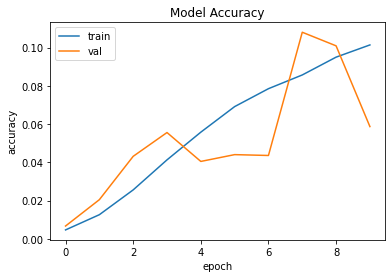

In [95]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [97]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss=history.history['loss']
val_loss=history.history['val_loss']

In [99]:
joblib.dump(train_acc,'model6_train_acc.pkl')
joblib.dump(val_acc,'model6_val_acc.pkl')

['model5_val_acc.pkl']

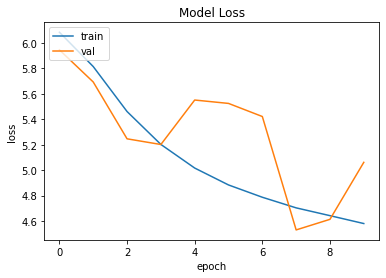

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [100]:
joblib.dump(val_loss,'model6_val_loss.pkl')
joblib.dump(train_loss,'model6_train_loss.pkl')

['model5_train_loss.pkl']